In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_excel('2021年上半年笔记本新品清单20210622v2.xlsx',index_col=0)
data.head()

,型号,品牌,价格,屏幕尺寸,分辨率,CPU型号,CPU主频,显卡,内存容量,硬盘容量,重量,操作系统
1,ROG 幻16(i7 11800H/16GB/512GB/RTX3060),ROG,11000.0,16.0,2560x1600,Intel 酷睿i7 11800H,2.4,RTX 3060,16.0,512GB SSD固态硬盘,1.90,Windows 10 Home
2,联想拯救者R9000P 2021(R7 5800H/16GB/512GB/RTX3060),联想,8799.0,16.0,2560x1600,AMD Ryzen 7 5800H,3.2,RTX 3060,16.0,512GB SSD固态硬盘,2.58,Windows 10 Home
3,惠普暗影精灵7(i7 11800H/16GB/512GB/RTX3050Ti),惠普,7099.0,16.1,1920x1080,Intel 酷睿i7 11800H,2.4,RTX 3050Ti,16.0,512GB SSD固态硬盘,2.32,Windows 10 Home
4,联想小新 Pro 16 2021 RTX(R7 5800H/16GB/512GB/RTX3050),联想,7346.0,16.0,2560x1600,AMD Ryzen 7 5800H,3.2,RTX 3050,16.0,512GB SSD固态硬盘,1.89,Windows 10 Home
5,惠普暗影精灵7(i7 11800H/16GB/512GB/RTX3060/144Hz),惠普,8299.0,16.1,1920x1080,Intel 酷睿i7 11800H,2.4,RTX 3060,16.0,512GB SSD固态硬盘,2.32,Windows 10 Home


In [7]:
# 查看基本统计信息
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 1 to 586
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   型号      586 non-null    object 
 1   品牌      586 non-null    object 
 2   价格      569 non-null    float64
 3   屏幕尺寸    585 non-null    float64
 4   分辨率     580 non-null    object 
 5   CPU型号   581 non-null    object 
 6   CPU主频   580 non-null    float64
 7   显卡      586 non-null    object 
 8   内存容量    582 non-null    float64
 9   硬盘容量    582 non-null    object 
 10  重量      560 non-null    float64
 11  操作系统    585 non-null    object 
dtypes: float64(5), object(7)
memory usage: 59.5+ KB


In [8]:
# 查看连续型变量描述统计
data.describe().round(2)

,价格,屏幕尺寸,CPU主频,内存容量,重量
count,569.00,585.00,580.00,582.00,560.00
mean,10878.69,15.18,2.60,18.45,1.90
std,7591.94,1.28,0.41,8.57,0.59
min,3299.00,12.30,1.60,4.00,0.77
25%,5999.00,14.00,2.40,16.00,1.40
50%,8199.00,15.60,2.60,16.00,1.79
75%,12500.00,15.60,3.00,16.00,2.36
max,53000.00,17.30,3.70,64.00,4.80


In [9]:
# 定义一个绘制柱状图函数
def draw_bar(df, title):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.bar(df.index, df.values)
    ax.set_title(title)
    for i,j in enumerate(df.values):
        ax.text(i,j,j,va='bottom',ha='center')
    plt.xticks(rotation=60)
    plt.show()

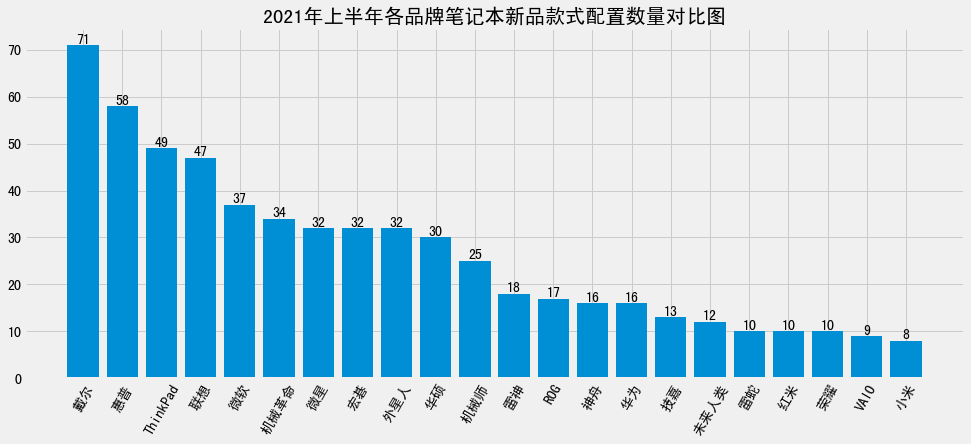

In [10]:
# 看看各品牌上半年发布的各款式不同配置的数量
df_count = data['品牌'].value_counts()
draw_bar(df_count, '2021年上半年各品牌笔记本新品款式配置数量对比图')

In [25]:
print(matplotlib.matplotlib_fname())
print(matplotlib.get_cachedir())
print(matplotlib.rcParams[ 'font.family'])
print(matplotlib.rcParams['font.sans-serif'])
#print(matplotlib.font_manager.fontManager.ttflist)

/Users/xiefei/anaconda2/envs/python37/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/xiefei/.matplotlib
['sans-serif']
['SimHei']


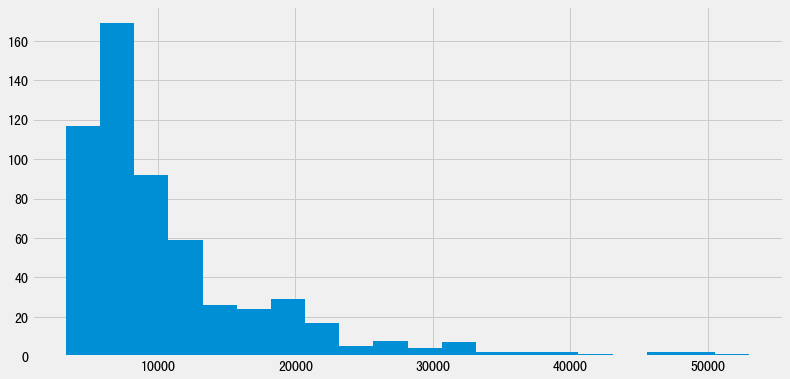

In [11]:
# 查看价格分布
plt.figure(figsize=(12,6))
data['价格'].hist(bins=20)
plt.show()

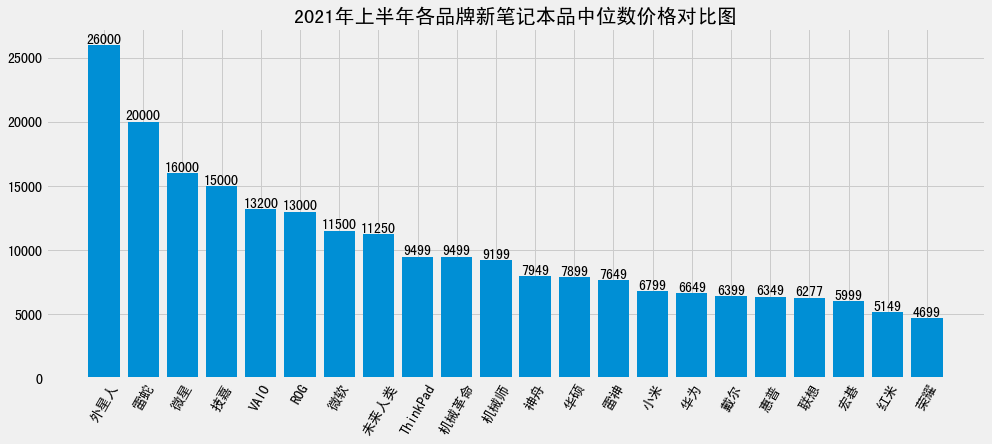

In [12]:
# 看看各品牌的价格中位数
df_price = data.groupby(['品牌'])['价格'].median().sort_values(ascending=False).astype("int")
draw_bar(df_price, '2021年上半年各品牌新笔记本品中位数价格对比图')

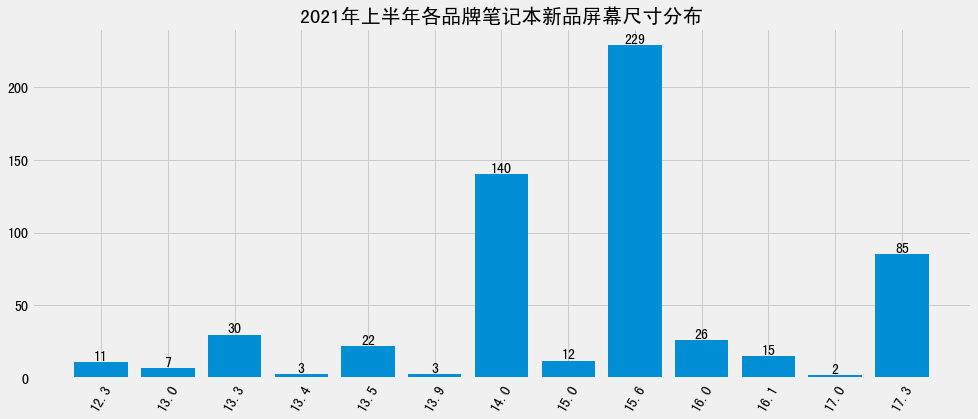

In [14]:
# 屏幕尺寸分布
df_screen = data['屏幕尺寸'].value_counts().sort_index()
df_screen.index = df_screen.index.astype("str")
draw_bar(df_screen , '2021年上半年各品牌笔记本新品屏幕尺寸分布')

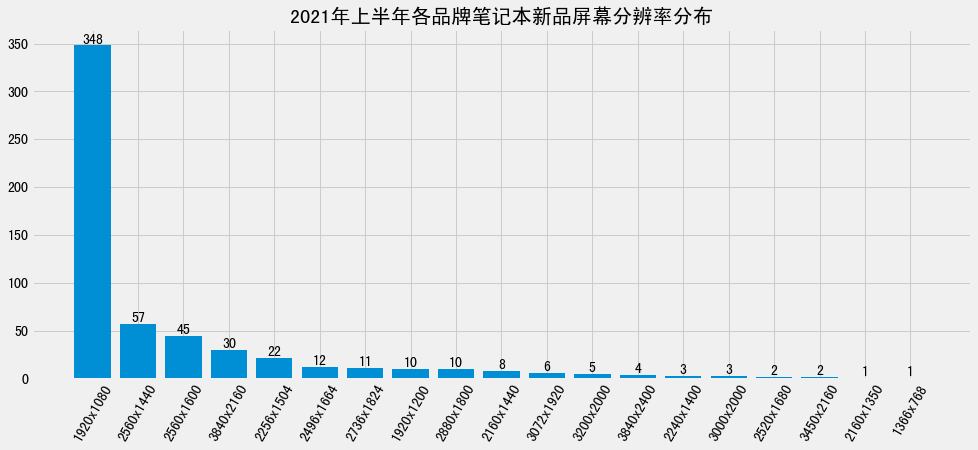

In [15]:
# 分辨率分布
df_resolution_ratio = data['分辨率'].value_counts()
draw_bar(df_resolution_ratio , '2021年上半年各品牌笔记本新品屏幕分辨率分布')

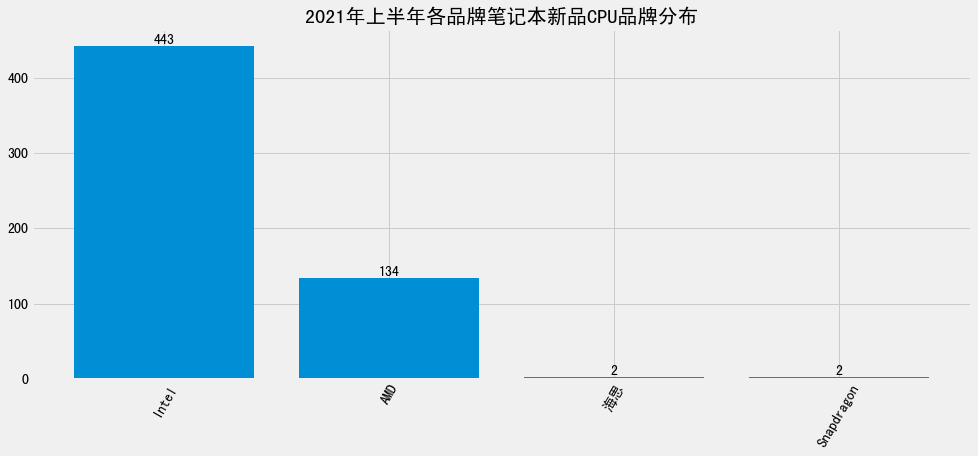

In [16]:
# 筛选出各cpu所属品牌
data['CPU品牌'] = data['CPU型号'].str.split(" ", expand=True)[0]
df_cpu_brand = data['CPU品牌'].value_counts()
draw_bar(df_cpu_brand, '2021年上半年各品牌笔记本新品CPU品牌分布')

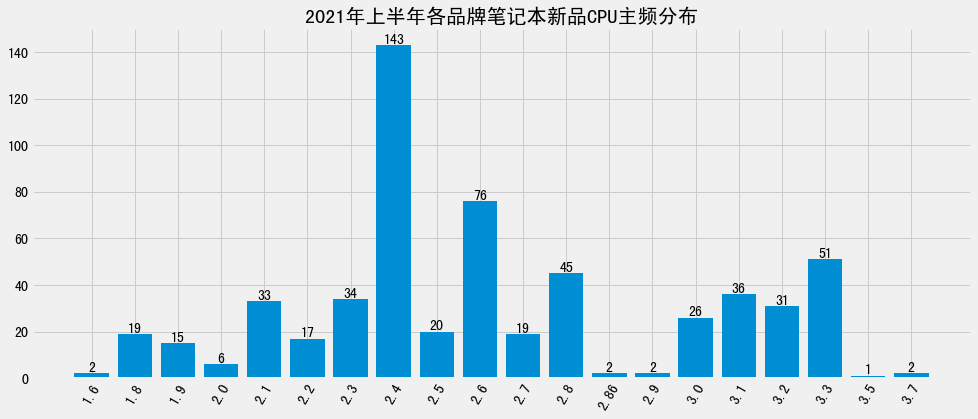

In [17]:
df_cpu_freq = data['CPU主频'].value_counts().sort_index()
df_cpu_freq.index = df_cpu_freq.index.astype("str") 
draw_bar(df_cpu_freq, '2021年上半年各品牌笔记本新品CPU主频分布')

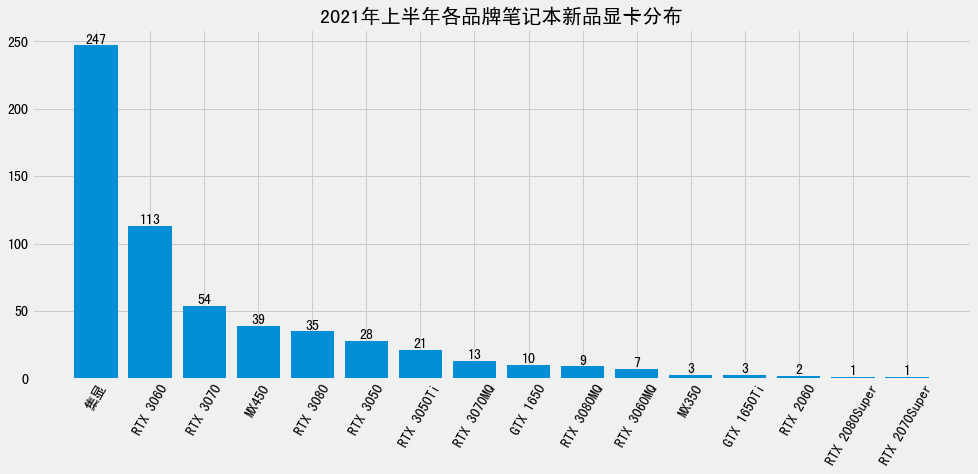

In [18]:
df_graphics_card = data['显卡'].value_counts()
draw_bar(df_graphics_card, '2021年上半年各品牌笔记本新品显卡分布')

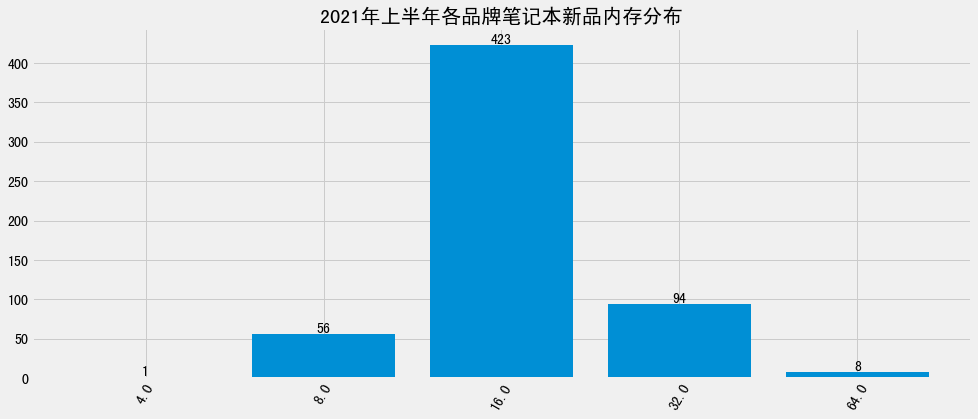

In [19]:
df_RAM = data['内存容量'].value_counts().sort_index()
df_RAM.index = df_RAM.index.astype("str") 
draw_bar(df_RAM, '2021年上半年各品牌笔记本新品内存分布')

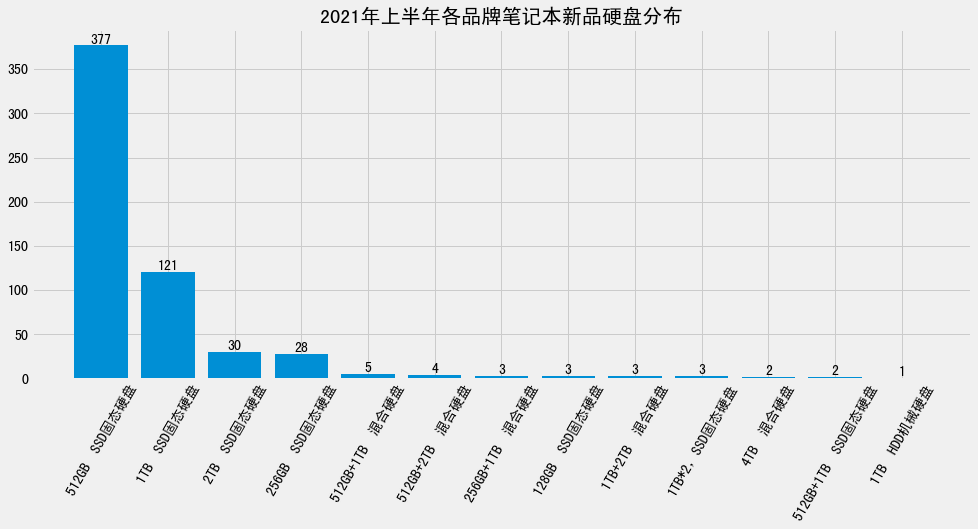

In [20]:
df_hard_drive= data['硬盘容量'].value_counts()
draw_bar(df_hard_drive, '2021年上半年各品牌笔记本新品硬盘分布')

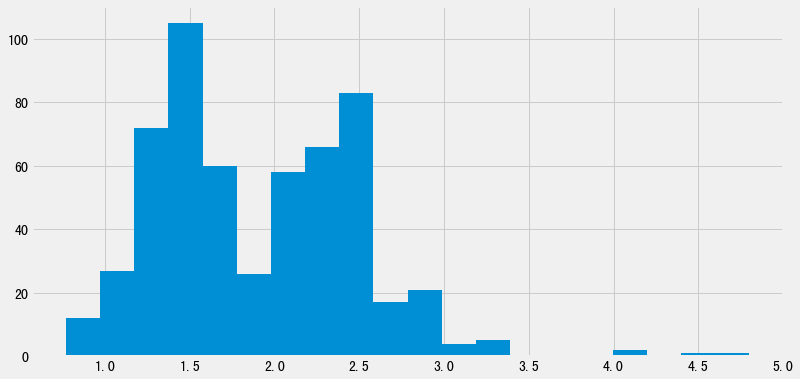

In [21]:
# 重量
plt.figure(figsize=(12,6))
data['重量'].hist(bins=20)
plt.show()

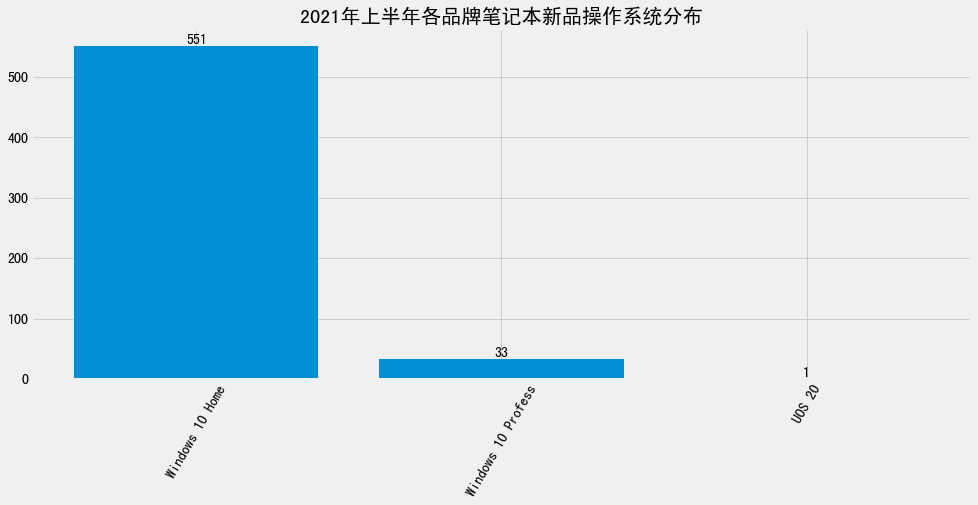

In [22]:
# 操作系统
df_system= data['操作系统'].value_counts()
draw_bar(df_system, '2021年上半年各品牌笔记本新品操作系统分布')

In [23]:
# 查看缺失值数量与比例
(
pd.DataFrame({
        "NaN_num": round(data.isnull().sum(),2),
        "NaN_percent":(data.isnull().sum()/data.shape[0]).apply(lambda x:str(round(x*100,2))+'%') ,
            })
  .sort_values('NaN_num', ascending=False)
)

,NaN_num,NaN_percent
重量,26,4.44%
价格,17,2.9%
分辨率,6,1.02%
CPU主频,6,1.02%
CPU型号,5,0.85%
CPU品牌,5,0.85%
内存容量,4,0.68%
硬盘容量,4,0.68%
屏幕尺寸,1,0.17%
操作系统,1,0.17%


In [24]:
# 保存只有价格缺失的数据
pred_data = data.loc[(data['价格'].isnull()) & (~data[data.columns.drop('价格')].isna().any(1))]
# 删除缺失值
data.dropna(inplace=True)

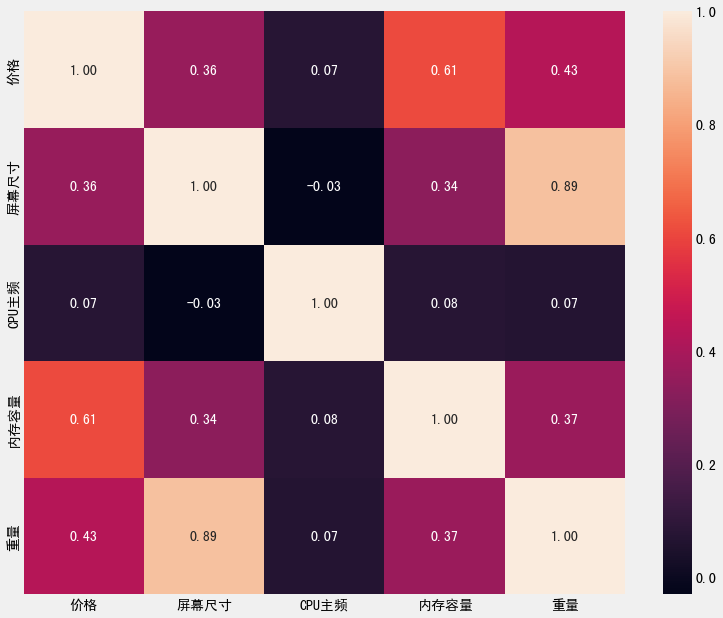

In [25]:
# 查看相关系数图
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [26]:
data.drop('CPU主频', axis=1, inplace=True)

In [27]:
data['price_ln'] = np.log(data['价格'])
# 查看偏度
print('价格对数转换前偏度：',data['价格'].skew())
# 查看转换后的偏度
print('价格对数转换后偏度：',data['price_ln'].skew())

价格对数转换前偏度： 2.241435349699024
价格对数转换后偏度： 0.6876367722224298


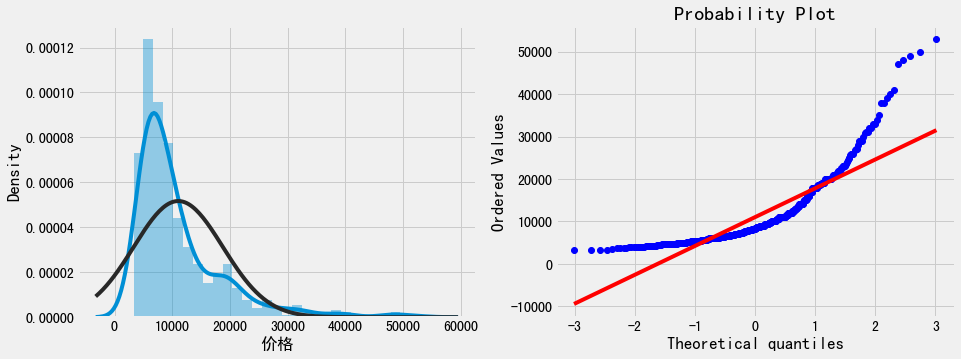

In [28]:
# 查看转换前后的直方图与QQ图
from scipy import stats
from scipy.stats import norm, skew 

def norm_test(data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    sns.distplot(data, fit=norm, ax=ax[0])
    stats.probplot(data, plot=ax[1])
    plt.show()
# 转换前
norm_test(data.价格)

In [29]:
# 查看重量偏度
data['重量'].skew()

0.6686619530205637

In [30]:
# 异常值处理
# 3sigma
data[~data['price_ln'].apply(lambda x: np.abs(x - data['price_ln'].mean()) / data['price_ln'].std() <= 3)]

,型号,品牌,价格,屏幕尺寸,分辨率,CPU型号,显卡,内存容量,硬盘容量,重量,操作系统,CPU品牌,price_ln
64,ROG 冰刃5 双屏(R9 5900HX/32GB/2TB/RTX3080),ROG,50000.0,15.6,3840x2160,AMD Ryzen 9 5900HX,RTX 3080,32.0,2TB SSD固态硬盘,2.4,Windows 10 Home,AMD,10.819778
96,Alienware X17 R1(i9 11980HK/64GB/2TB/RTX3080/4...,外星人,53000.0,17.3,3840x2160,Intel 酷睿i9 11980HK,RTX 3080,32.0,1TB SSD固态硬盘,3.2,Windows 10 Home,Intel,10.878047


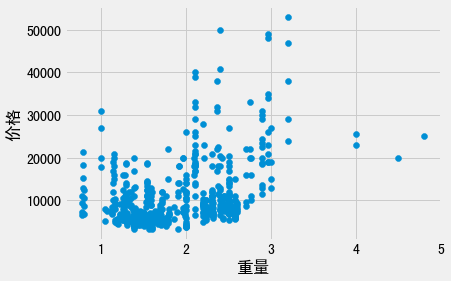

In [31]:
# 绘制价格与重量分布散点图
plt.scatter(data['重量'], data['价格'])
plt.xlabel("重量")
plt.ylabel("价格")
plt.show()

In [32]:
# 删除强影响点
data = data.query("重量 < 4")

In [33]:
# 查看各分类变量的种类数量
cat_list = ['品牌',  '屏幕尺寸', '分辨率', 'CPU型号', '显卡', '内存容量', '硬盘容量', '操作系统', 'CPU品牌']
data[cat_list].nunique()

品牌       22
屏幕尺寸     13
分辨率      18
CPU型号    48
显卡       13
内存容量      5
硬盘容量     11
操作系统      3
CPU品牌     4
dtype: int64

In [34]:
# 定义一个箱线图函数
def draw_boxplot(feature):
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.boxplot(x=feature, y='价格', data=data, ax=ax, linewidth=2)
    plt.xticks(rotation=60)
    plt.show()

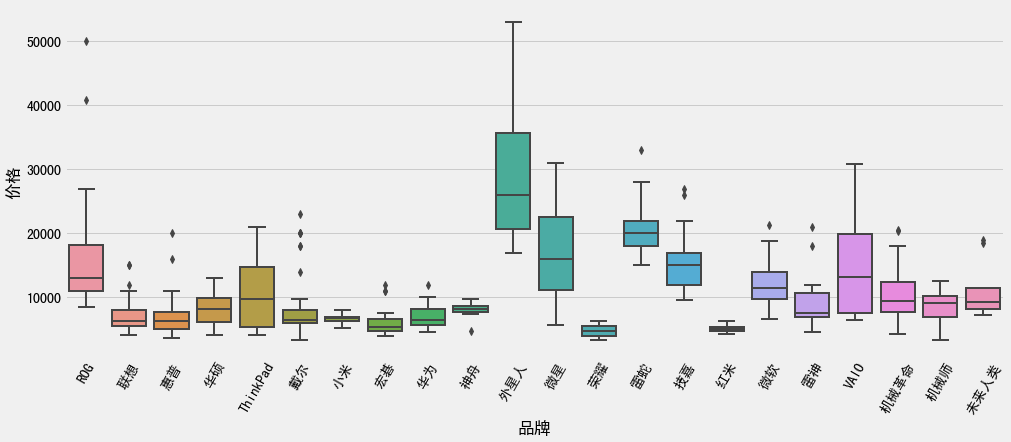

In [35]:
# 品牌
draw_boxplot('品牌')

In [36]:
brand_dict = {'game1':['外星人', '雷蛇', '微星', '技嘉', 'ROG'],
              'game2':['未来人类', '机械革命', '机械师', '神舟', '雷神'],
              'work1':['VAIO', '微软', 'ThinkPad'],
              'work2':['联想', '惠普', '华硕', '戴尔', '小米', '华为','宏碁', '荣耀', '红米']}

def brand_func(x):
    for key,values in brand_dict.items():
        if x in values:
            res = key
    return res
    
data['brand_level'] = data['品牌'].apply(lambda x : brand_func(x))
data['brand_level'].value_counts() 


work2    255
game1    102
game2     94
work1     88
Name: brand_level, dtype: int64

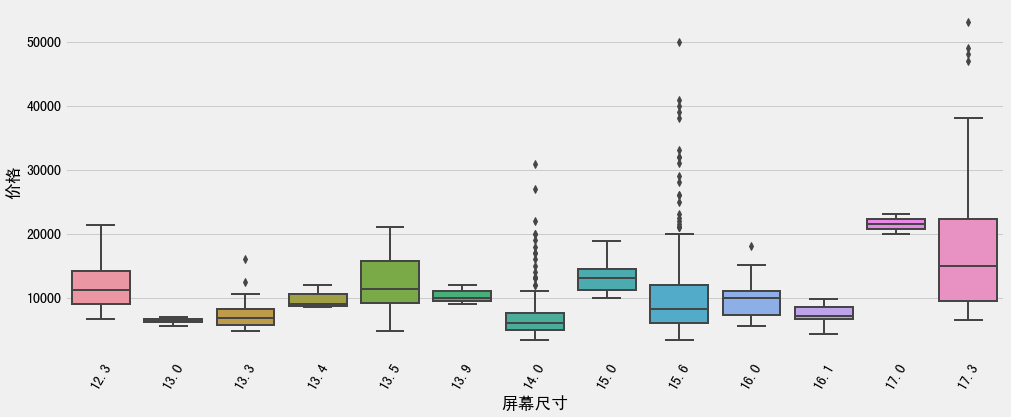

l     251
m     129
xl     81
s      76
Name: screen_level, dtype: int64

In [51]:
# 屏幕尺寸
draw_boxplot('屏幕尺寸')

def func(x):
    if x <= 13.9:
        res = 's'
    elif 13.9 < x <15 :
        res = 'm'
    elif 15 <= x < 16.2 :
        res = 'l'
    else:
        res = 'xl'
    return res

data['screen_level'] = data['屏幕尺寸'].apply(lambda x: func(x))
data['screen_level'].value_counts()

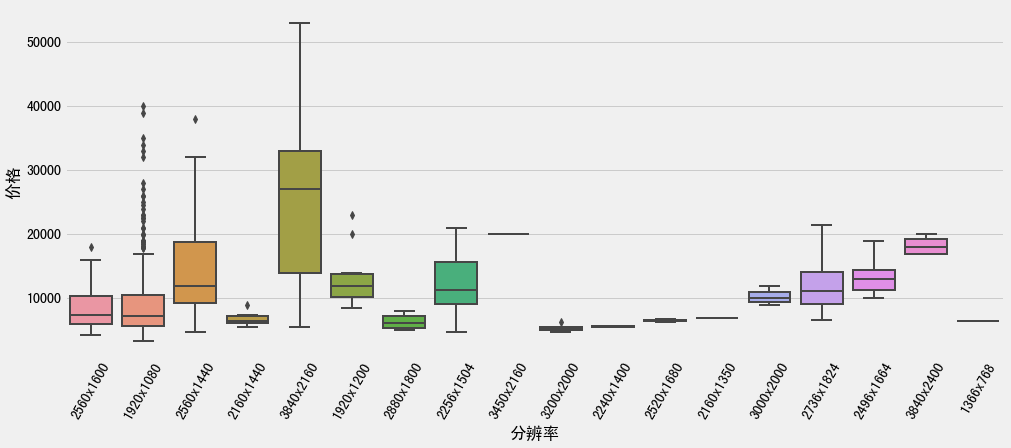

In [38]:
# 分辨率
draw_boxplot('分辨率')


In [39]:
def resolution_func(x):
    if x in ['2560x1600', '1920x1080', '2160x1440', '2880x1800', '3200x2000', '2240x1400', '2520x1680', '2160x1350','1366x768']:
        res = '1'
    elif x in ['2560x1440', '1920x1200', '2256x1504', '3000x2000', '2736x1824', '2496x1664']:
        res = '2'
    else:
        res = '3'
    return res

data['resolution_level'] = data['分辨率'].apply(lambda x : resolution_func(x))
data['resolution_level'].value_counts()


1    390
2    114
3     35
Name: resolution_level, dtype: int64

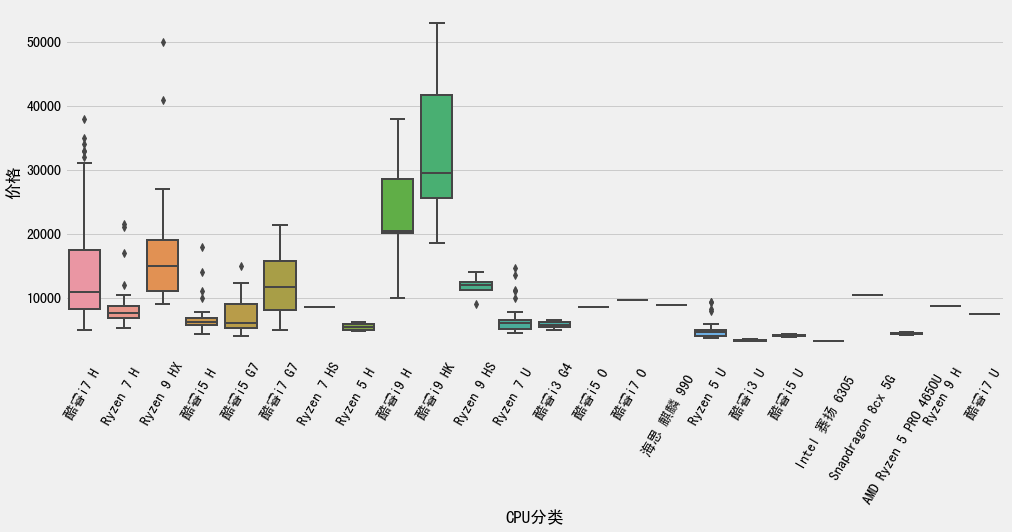

In [40]:
# CPU型号
# 提取处理器类别与最后的字母
tmp = data['CPU型号'].str.extract("\s(.*?\d)\s\d+(\w.?)")
data['CPU分类'] = tmp[0] + ' '+tmp[1]
# 像骁龙、海思处理器上面的正则表达式无法提取,结果为缺失值，所以将其赋值
data['CPU分类'].loc[data['CPU分类'].isnull()] = data['CPU型号'] 
draw_boxplot('CPU分类')


In [41]:
def cpu_func(x):
    if x in ['酷睿i7 H', 'Ryzen 9 HX', '酷睿i7 G7','酷睿i9 H', '酷睿i9 HK', 'Ryzen 9 HS',  'Snapdragon 8cx 5G']:
        res = '1'
    else:
        res = '2'
    return res
data['cpu_level'] = data['CPU分类'].apply(lambda x : cpu_func(x))
data['cpu_level'].value_counts()


2    440
1     99
Name: cpu_level, dtype: int64

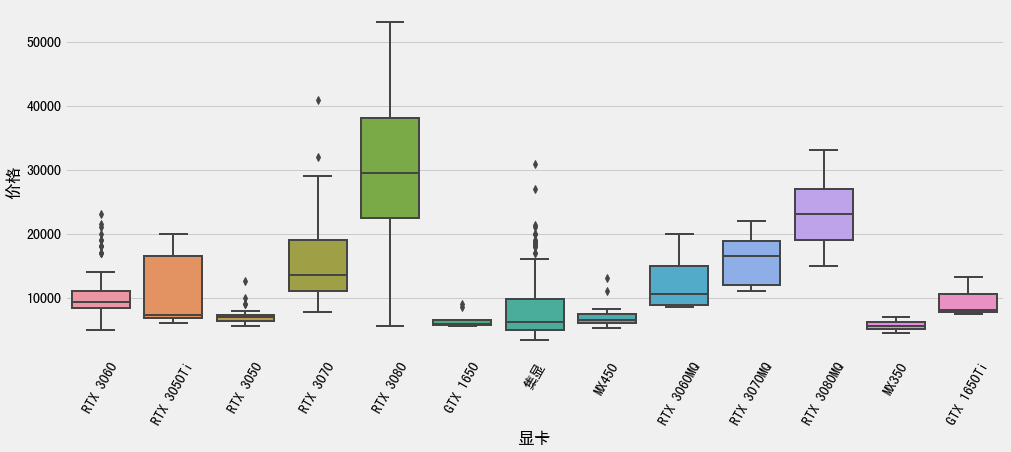

In [42]:
# 显卡
draw_boxplot('显卡')


In [43]:
def card_func(x):
    if x in ['RTX 3050Ti', 'RTX 3050', 'GTX 1650', '集显', 'MX450', 'MX350', 'GTX 1650Ti']:
        res = '1'
    elif x in ['RTX 3060', 'RTX 3070', 'RTX 3060MQ', 'RTX 3070MQ']:
        res = '2'
    else:
        res = '3'
    return res
data['card_level'] = data['显卡'].apply(lambda x : card_func(x))
data['card_level'].value_counts()


1    331
2    167
3     41
Name: card_level, dtype: int64

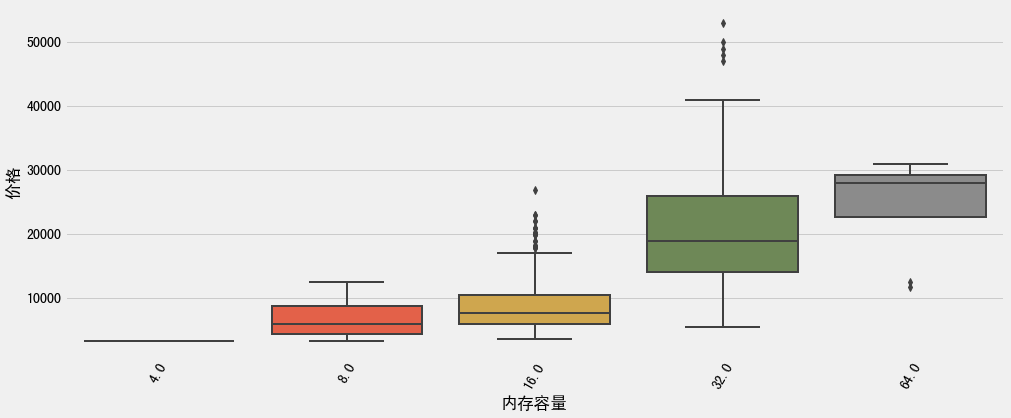

In [44]:
# 内存容量
draw_boxplot('内存容量')


In [45]:
def RAM_func(x):
    if x in [4, 8]:
        res = '8G及以下'
    elif x == 16:
        res = '16G'
    else:
        res = '32G及以上'
    return res
data['RAM_level'] = data['内存容量'].apply(lambda x : RAM_func(x))
data['RAM_level'].value_counts()


16G       396
32G及以上     95
8G及以下      48
Name: RAM_level, dtype: int64

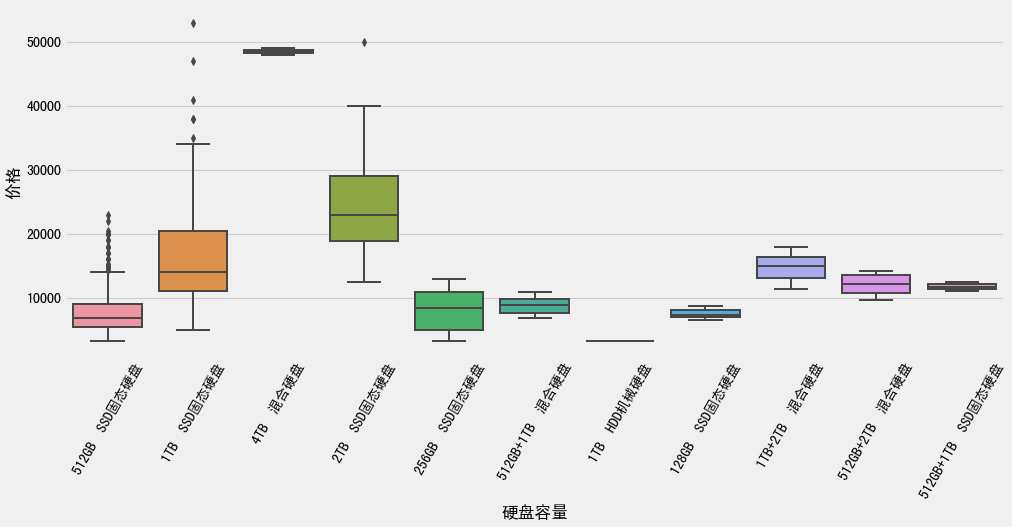

In [46]:
# 硬盘容量
draw_boxplot('硬盘容量')


In [47]:
data = data.query("硬盘容量 != '1TB  HDD机械硬盘'")  # 删除
def hard_disk_func(x):
    if x in ['512GB  SSD固态硬盘', '256GB  SSD固态硬盘', '512GB+1TB  混合硬盘',  '128GB  SSD固态硬盘']:
        res = '1'
    elif x in ['1TB  SSD固态硬盘', '1TB+2TB  混合硬盘', '512GB+1TB  混合硬盘', '512GB+1TB  SSD固态硬盘']:
        res = '2'
    else:
        res = '3'
    return res
data['hard_disk_level'] = data['硬盘容量'].apply(lambda x : hard_disk_func(x))
data['hard_disk_level'].value_counts()


1    384
2    119
3     35
Name: hard_disk_level, dtype: int64

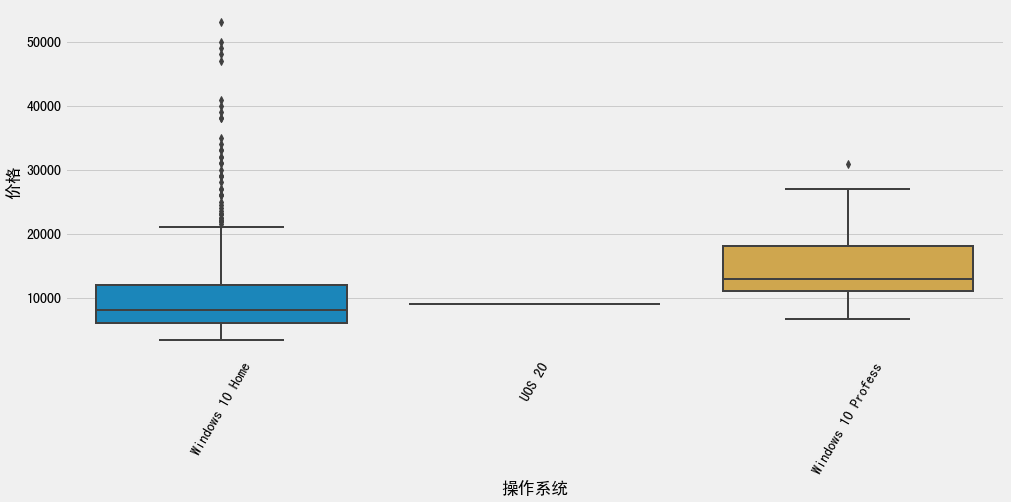

In [48]:
# 操作系统
draw_boxplot('操作系统')


In [49]:
data = data.query("操作系统 != 'UOS 20' ")
data['system'] = data['操作系统'].str.replace(" ", "_")


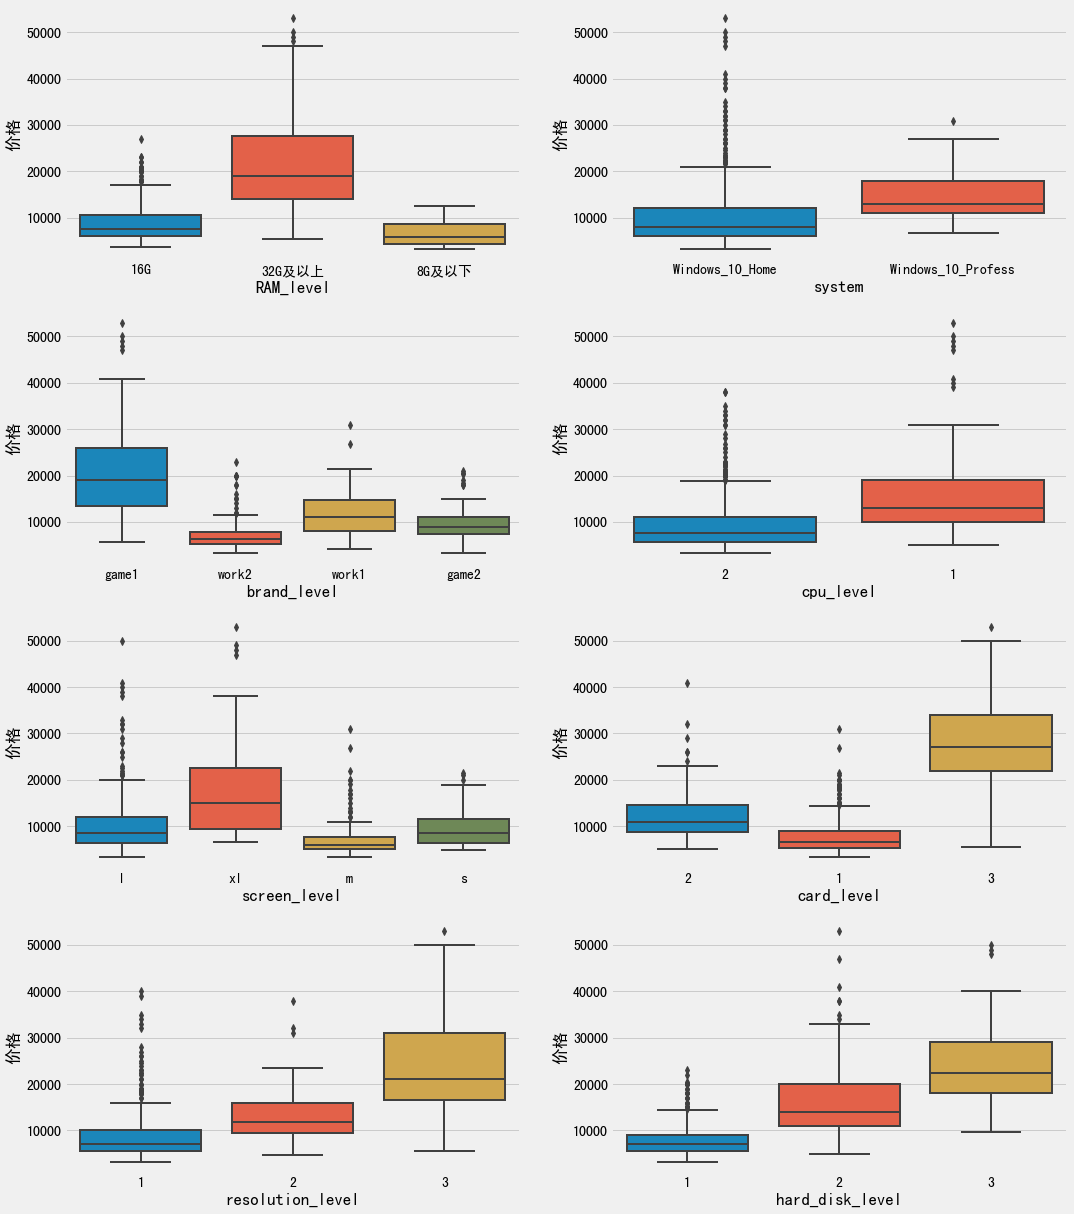

In [52]:
# 查看所有分完类的不同特征的价格是否存在差异
tmp_list = [['RAM_level','brand_level','screen_level','resolution_level'],
            [ 'system','cpu_level','card_level','hard_disk_level']]
            
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(16, 20))
for i,j in enumerate(tmp_list):
    for k, l in enumerate(j): 
        sns.boxplot(x= l, y='价格', data=data, ax=ax[k][i], linewidth=2)


In [53]:
### 建模
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=42, )


In [55]:
# 变量筛选
import statsmodels
#定义向前逐步回归函数
from statsmodels.formula.api import ols

def forward_select(data, target):
    variate=set(data.columns)  #将字段名转换成字典类型
    variate.remove(target)  #去掉因变量的字段名
    selected=[]
    current_score,best_new_score=float('inf'),float('inf')  #目前的分数和最好分数初始值都为无穷大（因为AIC越小越好）
    #循环筛选变量
    while variate:
        aic_with_variate=[]
        for candidate in variate:  #逐个遍历自变量
            formula="{}~{}".format(target,"+".join(selected+[candidate]))  #将自变量名连接起来
            aic=ols(formula=formula,data=data).fit().aic  #利用ols训练模型得出aic值
            aic_with_variate.append((aic,candidate))  #将第每一次的aic值放进空列表
        aic_with_variate.sort(reverse=True)  #降序排序aic值
        best_new_score,best_candidate=aic_with_variate.pop()  #最好的aic值等于删除列表的最后一个值，以及最好的自变量等于列表最后一个自变量
        if current_score>best_new_score:  #如果目前的aic值大于最好的aic值
            variate.remove(best_candidate)  #移除加进来的变量名，即第二次循环时，不考虑此自变量了
            selected.append(best_candidate)  #将此自变量作为加进模型中的自变量
            current_score=best_new_score  #最新的分数等于最好的分数
            print("aic is {},continuing!".format(current_score))  #输出最小的aic值
        else:
            print("for selection over!")
            break
    formula="{}~{}".format(target,"+".join(selected))  #最终的模型式子
    print("final formula is {}".format(formula))
    delete_var = [i for i in variate if i not in selected]
    print("剔除的变量为{}".format(delete_var))  # 打印删除的变量
    model=ols(formula=formula,data=data).fit()
    return model


In [56]:
variables = ['重量', 'brand_level', 'screen_level', 'resolution_level', 'cpu_level', 'card_level', 'RAM_level', 'hard_disk_level','system', 'price_ln']
ols_model = forward_select(train[variables], 'price_ln')


aic is 433.41349702115895,continuing!
aic is 291.5451036535244,continuing!
aic is 208.714950317147,continuing!
aic is 147.1570206985466,continuing!
aic is 129.6627472335383,continuing!
aic is 114.92229088750355,continuing!
aic is 103.05129549461321,continuing!
aic is 91.61235936913658,continuing!
for selection over!
final formula is price_ln~brand_level+card_level+hard_disk_level+resolution_level+RAM_level+system+重量+cpu_level
剔除的变量为['screen_level']


In [57]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               price_ln   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     103.3
Date:                Thu, 21 Jul 2022   Prob (F-statistic):          2.35e-125
Time:                        08:19:53   Log-Likelihood:                -30.806
No. Observations:                 429   AIC:                             91.61
Df Residuals:                     414   BIC:                             152.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        8.9582      0.087    102.833      0.000       8.787       9.129
brand_level[T.game2]            -0.4050      0.048     -8.444      0.000      -0.499      -0.311
brand_level[T.work1]            -0.0804      0.065     -1.229      0.220      -0.209       0.048
brand_level[T.work2]            -0.3755      0.050     -7.552      0.000      -0.473      -0.278
card_level[T.2]                  0.2119      0.050      4.271      0.000       0.114       0.309
card_level[T.3]                  0.5181      0.079      6.528      0.000       0.362       0.674
hard_disk_level[T.2]             0.2316      0.040      5.859      0.000       0.154       0.309
hard_disk_level[T.3]             0.2581      0.072      3.599      0.000       0.117       0.399
resolution_level[T.2]            0.2085      0.037      5.609      0.000       0.135       0.282
resolution_level[T.3]            0.3572      0.059      6.074      0.000       0.242       0.473
RAM_level[T.32G及以上]              0.1103      0.050      2.216      0.027       0.012       0.208
RAM_level[T.8G及以下]              -0.2118      0.049     -4.293      0.000      -0.309      -0.115
system[T.Windows_10_Profess]     0.2795      0.067      4.191      0.000       0.148       0.411
cpu_level[T.2]                  -0.1400      0.039     -3.630      0.000      -0.216      -0.064
重量                               0.1522      0.039      3.916      0.000       0.076       0.229
==============================================================================
Omnibus:                       45.359   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.877
Skew:                           0.689   Prob(JB):                     2.47e-16
Kurtosis:                       4.457   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

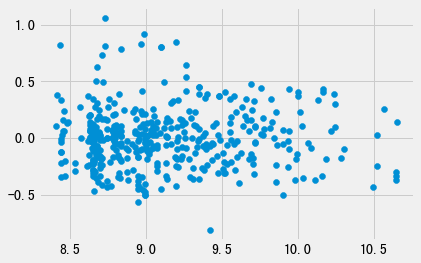

In [58]:
# 残差齐性检验
train_pred = ols_model.predict(train)
train_resid = ols_model.resid
plt.scatter(train_pred, train_resid)
plt.show()


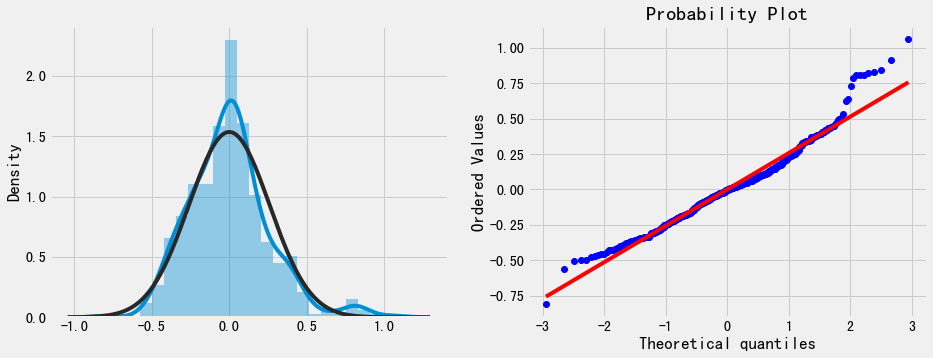

In [59]:
# 残差正态性检验---直方图与QQ图
norm_test(train_resid)



In [60]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
pred_ols_model = ols_model.predict(test)
print('r2_score：', r2_score(test.price_ln, pred_ols_model)) 
test['pred_price'] = np.power(np.e, pred_ols_model)
print('RMSE：', mean_squared_error(test['价格'], test['pred_price'])** 0.5)


r2_score： 0.8224419373780607
RMSE： 3499.9002210560125


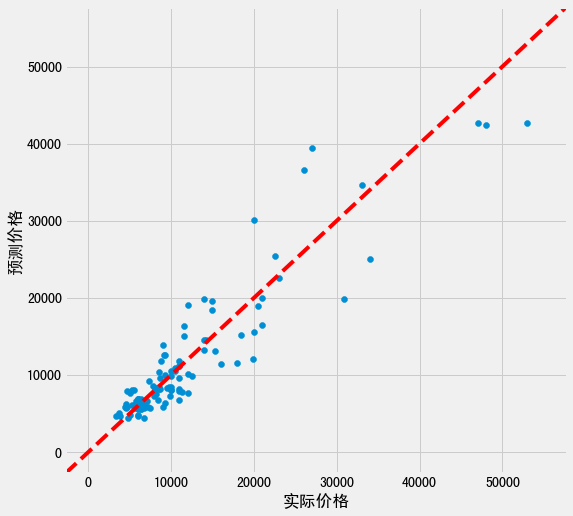

In [61]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(test['价格'], test['pred_price'])
ax.axline(xy1=(0, 0), xy2=(55000, 55000), linestyle='--', color='red')
ax.set_xlabel('实际价格')
ax.set_ylabel('预测价格')
plt.show()


In [62]:
pred_df = test.head(1).copy()

pred_df['重量'] = 2.5
pred_df['brand_level'] = 'work2'
pred_df['screen_level'] =  'l'
pred_df['cpu_level'] = '1'
pred_df['card_level'] = '2'
pred_df['RAM_level'] = '2'
pred_df['RAM_level'] = '16G'
pred_df['hard_disk_level'] = "2"
pred_df['system'] = "Windows_10_Home"

pred_df_value  =  ols_model.predict(pred_df)
print(pred_data.head(1)['型号'].values[0], '的预测价格为：', np.power(np.e, pred_df_value.values[0]))


联想拯救者Y9000K 2021(i7 11800H/16GB/1TB/RTX3060) 的预测价格为： 12169.965728061426


In [63]:
####### 随机森林
#######
cat_list = [ 'RAM_level','brand_level', 'screen_level','resolution_level', 'system', 'cpu_level', 'card_level','hard_disk_level']
df = pd.get_dummies(data, columns=cat_list)
# 划分训练集测试集
train_X, train_y = df.loc[train.index,][df.columns[14:].tolist() + ['重量']], df.loc[train.index,].price_ln
test_X, test_y = df.loc[test.index,][df.columns[14:].tolist() + ['重量']], df.loc[test.index,].price_ln 


In [64]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(random_state=43).fit(train_X, train_y)
RFR_preds = RFR_model.predict(test_X)
print('模型默认参数验证集R2：', r2_score(test_y, RFR_preds)) 
test['pred_price_RFR'] = np.power(np.e, RFR_preds)
print('模型默认参数验证集RMSE：',mean_squared_error(test['价格'], test['pred_price_RFR'])** 0.5)  


模型默认参数验证集R2： 0.8839090140860729
模型默认参数验证集RMSE： 2840.291594098016


In [65]:
%%time
from sklearn.model_selection import RandomizedSearchCV

RFR = RandomForestRegressor()
# 设置范围
n_estimators = np.arange(1, 1001, 100)
min_samples_split = [2, 7, 12, 17]
min_samples_leaf = [1, 4, 7, 10]
max_depth = [4, 7, 10, 13]
max_features = ['auto','sqrt']
bootstrap = [True,False]
# 需要调整的参数
random_params_group = {'n_estimators': n_estimators,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf': min_samples_leaf,
                      'max_depth': max_depth,
                      'max_features': max_features,
                      'bootstrap': bootstrap}
# 建立RandomizedSearchCV模型
random_search_model = RandomizedSearchCV(RFR, param_distributions = random_params_group, n_iter = 100,
                                  scoring = 'neg_mean_squared_error' ,n_jobs = -1, cv = 3, random_state = 44)
# 训练数据
random_search_model.fit(train_X, train_y)
# 打印最佳参数
random_search_model.best_params_


CPU times: user 1.69 s, sys: 101 ms, total: 1.79 s
Wall time: 1min 8s


{'n_estimators': 201,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [67]:
%%time
from sklearn.model_selection import GridSearchCV

# 网格搜索调参n_estimators
param_grid = {'n_estimators': [150, 200, 250],
             'min_samples_split': [2, 3, 4],
             'min_samples_leaf': [1, 2, 3],
             'max_depth': [9, 10, 11]}

RFR = RandomForestRegressor(random_state = 45)
grid_search_model = GridSearchCV(estimator=RFR, param_grid=param_grid,
                        scoring='neg_mean_squared_error', n_jobs = -1, cv=3)
grid_search_model.fit(train_X, train_y)
# 打印最佳参数
grid_search_model.best_params_


CPU times: user 1.53 s, sys: 57.1 ms, total: 1.59 s
Wall time: 43.7 s


{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [68]:
best_model = grid_search_model.best_estimator_
RFR_gs_preds = best_model.predict(test_X)
print('模型默认参数验证集R2：', r2_score(test_y, RFR_gs_preds))
test['pred_price_RFR_gs'] = np.power(np.e, RFR_gs_preds)
print('模型默认参数验证集RMSE：',mean_squared_error(test['价格'], test['pred_price_RFR_gs'])** 0.5) 


模型默认参数验证集R2： 0.8898229302217273
模型默认参数验证集RMSE： 2736.917344601958


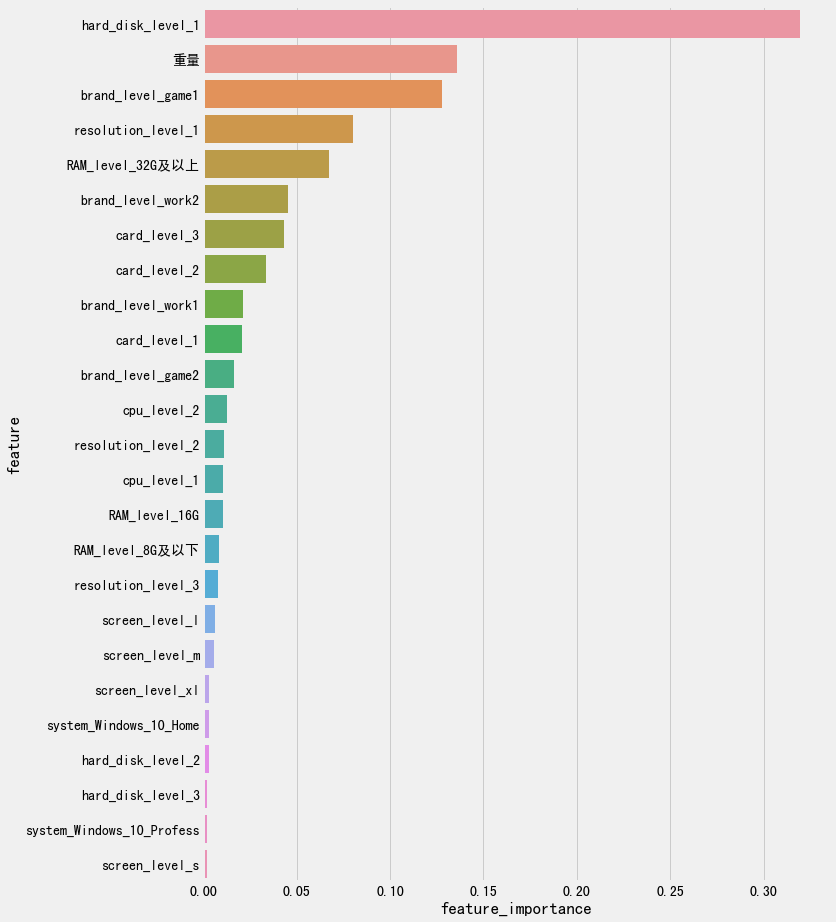

In [69]:
# 创建特征重要性df
feature_importance= (pd.DataFrame({'feature': train_X.columns,
                                   'feature_importance': RFR_model.feature_importances_})
                       .sort_values('feature_importance', ascending=False)
                       .round(4))

# 绘制barh图查看特征重要性排序
plt.figure(figsize=(10, 15))
sns.barplot(x='feature_importance', y='feature', data=feature_importance)
plt.show()


In [70]:
RFR_pred_data  = [[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2.5]]
RFR_pred_value = best_model.predict(RFR_pred_data)[0]
print(pred_data.head(1)['型号'].values[0], '的随机森林回归预测价格为：', np.power(np.e, RFR_pred_value))


联想拯救者Y9000K 2021(i7 11800H/16GB/1TB/RTX3060) 的随机森林回归预测价格为： 10924.143394391758
